In [2]:
import ROOT
import os
work_dir = '/'.join([os.environ["CMSSW_BASE"], 'src', 'Analysis', 'VVAnalysis'])
print work_dir
os.chdir(work_dir)

Welcome to JupyROOT 6.12/07
/afs/hep.wisc.edu/cms/kdlong/WZAnalysis/CMSSW_10_4_0_patch1/src/Analysis/VVAnalysis


In [3]:
DY_xsec = 5765.4 # in pb
lumi = 35.9*1000
#Copy the file /nfs_scratch/kdlong/temp/9D8BBBB2-187D-CE49-9CAE-009ADB180509_Skim.root to your directory

In [4]:
%run ./Utilities/scripts/makeHistFile.py --noHistConfig --test -f test/9D8BBBB2-187D-CE49-9CAE-009ADB180509_Skim.root -s TightWithLooseVeto -o testZ.root -a Zstudy

INFO: assuming histogram information is specified in selector
Processing channel Inclusive for dataset test/9D8BBBB2-187D-CE49-9CAE-009ADB180509_Skim.root
INFO: using simple file test/9D8BBBB2-187D-CE49-9CAE-009ADB180509_Skim.root


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [5]:
rtfile = ROOT.TFile("testZ.root")
rtfile.ls()
rtfile.cd("test")
rtfile.ls()

TFile**		testZ.root	
 TFile*		testZ.root	
  KEY: TDirectoryFile	test;1	test/9D8BBBB2-187D-CE49-9CAE-009ADB180509_Skim.root
TFile**		testZ.root	
 TFile*		testZ.root	
  TDirectoryFile*		test	test/9D8BBBB2-187D-CE49-9CAE-009ADB180509_Skim.root
   KEY: TDirectoryFile	9D8BBBB2-187D-CE49-9CAE-009ADB180509_Skim.root;1	9D8BBBB2-187D-CE49-9CAE-009ADB180509_Skim.root
   KEY: TH1D	cutflow_ee;1	Tight leptons
   KEY: TH1D	cutflow_mm;1	Tight leptons
   KEY: TH1D	ZMass_ee;1	Tight leptons
   KEY: TH1D	ZMass_mm;1	Tight leptons
   KEY: TH1D	ptl1_ee;1	Tight leptons
   KEY: TH1D	ptl1_mm;1	Tight leptons
   KEY: TH1D	ptl2_ee;1	Tight leptons
   KEY: TH1D	ptl2_mm;1	Tight leptons
   KEY: TH1D	sumweights;1	sumweights
  KEY: TDirectoryFile	test;1	test/9D8BBBB2-187D-CE49-9CAE-009ADB180509_Skim.root


In [6]:
sumWeightsProcessed = rtfile.Get("test/sumweights").Integral()
print sumWeightsProcessed

2174367.0


In [15]:
hist_ZMass_ee = rtfile.Get("test/ZMass_ee")
hist_ZMass_mm = rtfile.Get("test/ZMass_mm")
hist_ZMass_ee.SetLineColor(ROOT.kGreen-6)
hist_ZMass_mm.SetLineColor(ROOT.kBlue)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


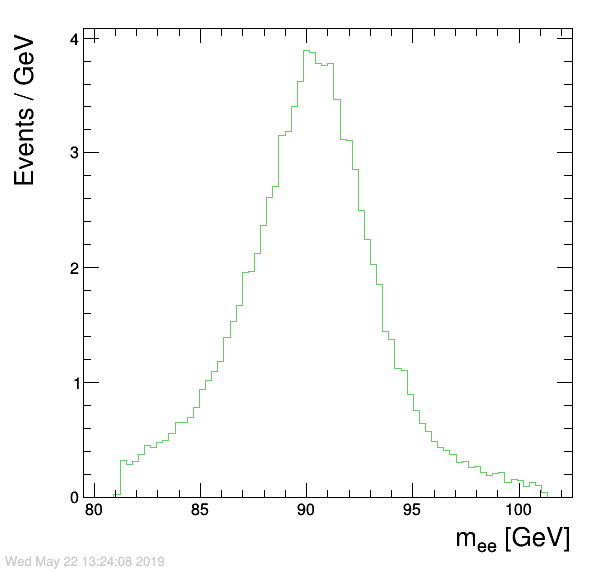

In [16]:
canvas = ROOT.TCanvas("canvas", "canvas")
hist_ZMass_ee.Draw("hist")
hist_ZMass_ee.GetYaxis().SetTitle("Events / GeV")
hist_ZMass_ee.Scale(DY_xsec*lumi/sumWeightsProcessed)
canvas.Draw()

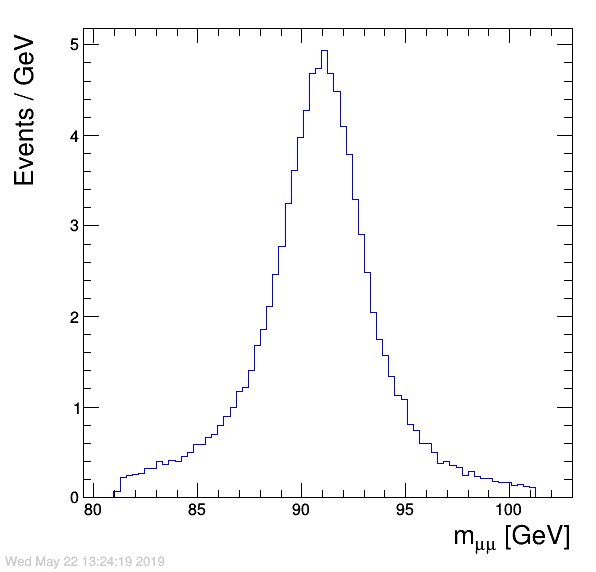

In [17]:
hist_ZMass_mm.Draw("hist")
hist_ZMass_mm.GetYaxis().SetTitle("Events / GeV")
hist_ZMass_mm.Scale(DY_xsec*lumi/sumWeightsProcessed)
canvas.Draw()

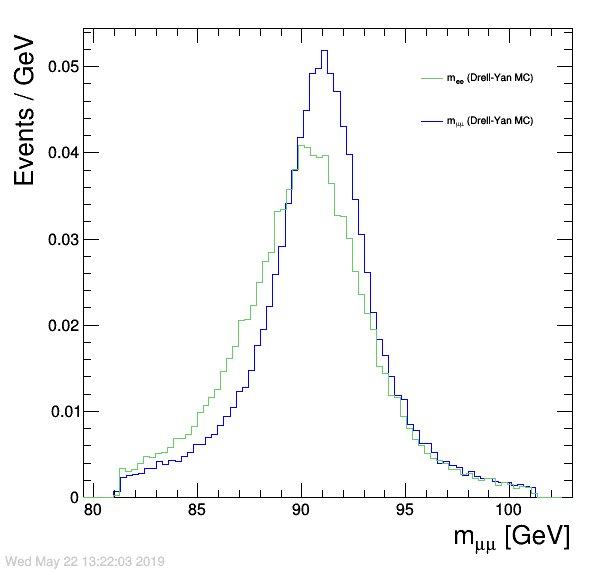

In [11]:
hist_ZMass_mm.Draw("hist")
hist_ZMass_ee.Draw("hist same")
legend = ROOT.TLegend(0.7,0.75,0.9,0.9)
legend.AddEntry(hist_ZMass_ee, "m_{ee} (Drell-Yan MC)", "l")
legend.AddEntry(hist_ZMass_mm, "m_{#mu#mu} (Drell-Yan MC)", "l")
legend.Draw()
canvas.Draw()

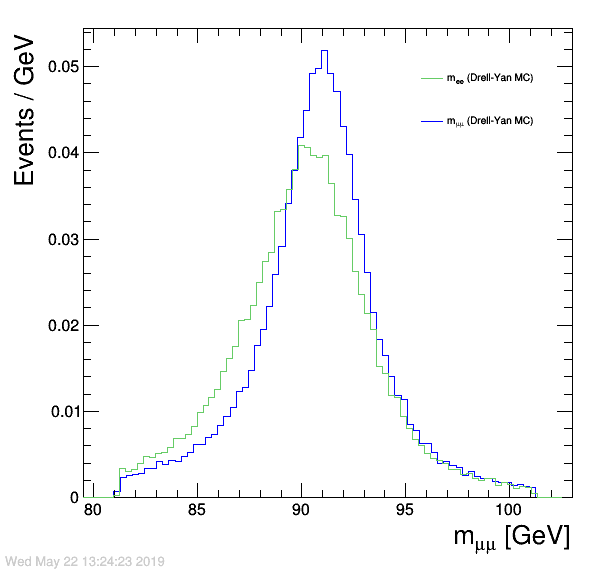

In [18]:
hist_ZMass_mm.Scale(1/hist_ZMass_mm.Integral())
hist_ZMass_ee.Scale(1/hist_ZMass_ee.Integral())
hist_ZMass_mm.Draw("hist")
hist_ZMass_ee.Draw("hist same")
legend.Draw()
canvas.Draw()

In [19]:
hist_ptl1_ee = rtfile.Get("Unknown/ptl1_ee")
hist_ptl1_mm = rtfile.Get("Unknown/ptl1_mm")
hist_ptl1_ee.SetLineColor(ROOT.kGreen-6)
hist_ptl1_mm.SetLineColor(ROOT.kBlue)

AttributeError: 'TObject' object has no attribute 'SetLineColor'

In [14]:
hist_ptl1_mm.Scale(1/hist_ptl1_mm.Integral())
hist_ptl1_ee.Scale(1/hist_ptl1_ee.Integral())
hist_ptl1_ee.GetYaxis().SetTitle("Events / 2 GeV")
hist_ptl1_mm.GetYaxis().SetTitle("Events / 2 GeV")
hist_ptl1_ee.Draw("hist")
hist_ptl1_mm.Draw("hist same")
legend = ROOT.TLegend(0.7,0.75,0.9,0.9)
legend.AddEntry(hist_ptl1_ee, "p_{T}(e^{1}) (Drell-Yan MC)", "l")
legend.AddEntry(hist_ptl1_mm, "p_{T}(#mu^{1}) (Drell-Yan MC)", "l")
legend.Draw()
canvas.Draw()

AttributeError: 'TObject' object has no attribute 'Scale'